## 3. Attractive and Repulsive Potential Fields
This code creates a potential field combining attractive and repulsive forces.

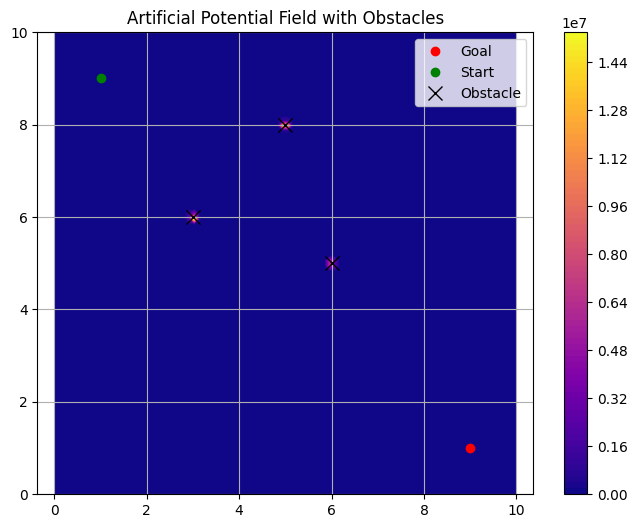

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Create 2D grid space
x_vals = np.linspace(0, 10, 100)
y_vals = np.linspace(0, 10, 100)
X, Y = np.meshgrid(x_vals, y_vals)

# Start and goal locations
start_point = np.array([1, 9])
goal_point = np.array([9, 1])

# Define static obstacles
obstacle_positions = [np.array([3, 6]), np.array([6, 5]), np.array([5, 8])]

# Potential field parameters
k_att = 2.0              # strength of attractive field
k_rep = 100              # strength of repulsive field
influence_radius = 1.5   # distance threshold for repulsion

# Attractive potential field (parabolic towards goal)
U_attract = k_att * ((X - goal_point[0])**2 + (Y - goal_point[1])**2)

# Repulsive potential field initialization
U_repulse = np.zeros_like(X)

# Compute repulsive potential for each obstacle
for obs in obstacle_positions:
    dx = X - obs[0]
    dy = Y - obs[1]
    dist_squared = dx**2 + dy**2
    within_influence = dist_squared < influence_radius**2
    with np.errstate(divide='ignore'):
        rep_value = k_rep * (1.0 / dist_squared - 1.0 / influence_radius**2)**2
        U_repulse += np.where(within_influence, rep_value, 0)

# Total potential field
U_total = U_attract + U_repulse

# Plotting
plt.figure(figsize=(8, 6))
contour = plt.contourf(X, Y, U_total, levels=80, cmap='plasma')
plt.colorbar(contour)

# Mark goal and start
plt.plot(goal_point[0], goal_point[1], 'ro', label='Goal')
plt.plot(start_point[0], start_point[1], 'go', label='Start')

# Mark obstacles
for i, obs in enumerate(obstacle_positions):
    plt.plot(obs[0], obs[1], 'kx', markersize=10, label='Obstacle' if i == 0 else None)

plt.title("Artificial Potential Field with Obstacles")
plt.axis('equal')
plt.grid(True)
plt.legend(loc='upper right')
plt.show()
